Nama : Suwandi Ramadhan
# PROJECT 3 : VOICE RECOGNITION
## Klasifikasi Maksud Ucapan (Intent Classification)

#### TUJUAN :
Membangun model yang dapat mengenali dan
mengklasifikasikan maksud (intent) dari sebuah rekaman suara.

#### DATASET:
https://huggingface.co/datasets/PolyAI/minds14

#### <Strong>Data Field</Strong>

| Nama Kolom | Tipe Data | Keterangan |
|:----------:|:---------:|:----------:|
|`path `| String | Path to the audio file |
|`audio `| Dict | Audio object including loaded audio array, sampling rate and path ot audio |
|`transcription `| String | Transcription of the audio file |
|`english_transcription `| String | English transcription of the audio file |
|`intent_class `| Integer | Class id of intent |
|`lang_id `| Integer | Id of language |

#### <strong>Penggunaan Bahasa Pada Dataset</strong>
-`all`

#### <strong>Pengolahan Dataset</strong>
-`Pembagian Dataset` = <strong>Training</strong>(70%), <strong>Validasi</strong>(15%), dan <strong>Test</strong>(15%) <br>
-`Audio Preprocessing` = <strong>Resampling</strong>, Audio diseragamkan ke sampling rate 16000 Hz <br>


#### MODEL :
Training model menggunakan ` Bidirectional LSTM` <br>
Feature Extraction `MFCC`

In [1]:
from datasets import load_dataset

print("Memuat dataset MINDS-14...")
dataset = load_dataset("PolyAI/minds14", name="all", split="train", trust_remote_code=True)
print("\nDataset berhasil dimuat:")
print(dataset)

C:\Users\Suwaaan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Memuat dataset MINDS-14...

Dataset berhasil dimuat:
Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 8168
})


In [2]:
import pandas as pd
from IPython.display import display

df = dataset.to_pandas()
csv_path = "../data/minds14.csv"
df.to_csv(csv_path, index=False)

print("Data sudah disimpan ke ../data/minds14.csv")

Data sudah disimpan ke ../data/minds14.csv


In [3]:
# Menampilkan informasi dasar tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   path                   8168 non-null   object
 1   audio                  8168 non-null   object
 2   transcription          8168 non-null   object
 3   english_transcription  8168 non-null   object
 4   intent_class           8168 non-null   int64 
 5   lang_id                8168 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 383.0+ KB


Pengolahan Dataset <br>
-Pembagian Dataset = Training (70%), Validation (15%), dan Test (15%) <br>
-Audio Preprocessing = Resampling, Audio diseragamkan ke sampling rate 16000 Hz agar sesuai dengan model Wav2Vec2. <br>
-Ekstraksi Fitur = Model Wav2Vec2 akan mengekstraksi fitur audio secara internal dari data gelombang mentah. <br>
-Normalisasi = Fitur audio akan dinormalisasi secara internal oleh feature extractor model.

In [4]:
df.head()

,path,audio,transcription,english_transcription,intent_class,lang_id
0,C:\Users\Suwaaan\.cache\huggingface\datasets\d...,"{'bytes': None, 'path': 'C:\Users\Suwaaan\.cac...",Dobrý den potřeboval bych zjistit jaký je maxi...,"Hello, I need to find out what is the maximum ...",3,0
1,C:\Users\Suwaaan\.cache\huggingface\datasets\d...,"{'bytes': None, 'path': 'C:\Users\Suwaaan\.cac...",Dobrý den Budu si poprvé vybírat peníze z vaše...,Hello I will withdraw money from your ATM for ...,3,0
2,C:\Users\Suwaaan\.cache\huggingface\datasets\d...,"{'bytes': None, 'path': 'C:\Users\Suwaaan\.cac...",Jaký je limit který si můžu vybrat z bankomatu,What is the limit I can choose from an ATM,3,0
3,C:\Users\Suwaaan\.cache\huggingface\datasets\d...,"{'bytes': None, 'path': 'C:\Users\Suwaaan\.cac...",Kolik peněz si můžu vybrat z bankomatu,How much money can I withdraw from an ATM,3,0
4,C:\Users\Suwaaan\.cache\huggingface\datasets\d...,"{'bytes': None, 'path': 'C:\Users\Suwaaan\.cac...",Dobrý den rád bych se vás zeptal Chtěl bych si...,"Hello, I would like to ask you I would like to...",3,0


In [5]:
from IPython.display import Audio, display

sample = dataset[0]
print("\nStruktur satu sampel data:")
for key, value in sample.items():
    print(f"  - {key}: {value}")

intent_names = dataset.features['intent_class'].names
num_intents = len(intent_names)
print(f"\nDaftar Intent ({num_intents} kelas):")
print(intent_names)

print("\nContoh sample transkrip, intent, dan audio")
print(f"Transkripsi : '{sample['english_transcription']}'")
print(f"Intent : {intent_names[sample['intent_class']]}")

display(Audio(sample['audio']['array'], rate=sample['audio']['sampling_rate']))


Struktur satu sampel data:
  - path: C:\Users\Suwaaan\.cache\huggingface\datasets\downloads\extracted\40ab81c17f20c9febe83aac52b8ce606e43db0e89e52ec520205aef59d4f1d5e\cs-CZ~ATM_LIMIT\response_4.wav
  - audio: {'path': 'C:\\Users\\Suwaaan\\.cache\\huggingface\\datasets\\downloads\\extracted\\40ab81c17f20c9febe83aac52b8ce606e43db0e89e52ec520205aef59d4f1d5e\\cs-CZ~ATM_LIMIT\\response_4.wav', 'array': array([ 0.        ,  0.        ,  0.00024414, ..., -0.0012207 ,
       -0.0012207 , -0.00146484]), 'sampling_rate': 8000}
  - transcription: Dobrý den potřeboval bych zjistit jaký je maximální limit pro výběr z bankomatu
  - english_transcription: Hello, I need to find out what is the maximum limit for withdrawing from an ATM
  - intent_class: 3
  - lang_id: 0

Daftar Intent (14 kelas):
['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill']



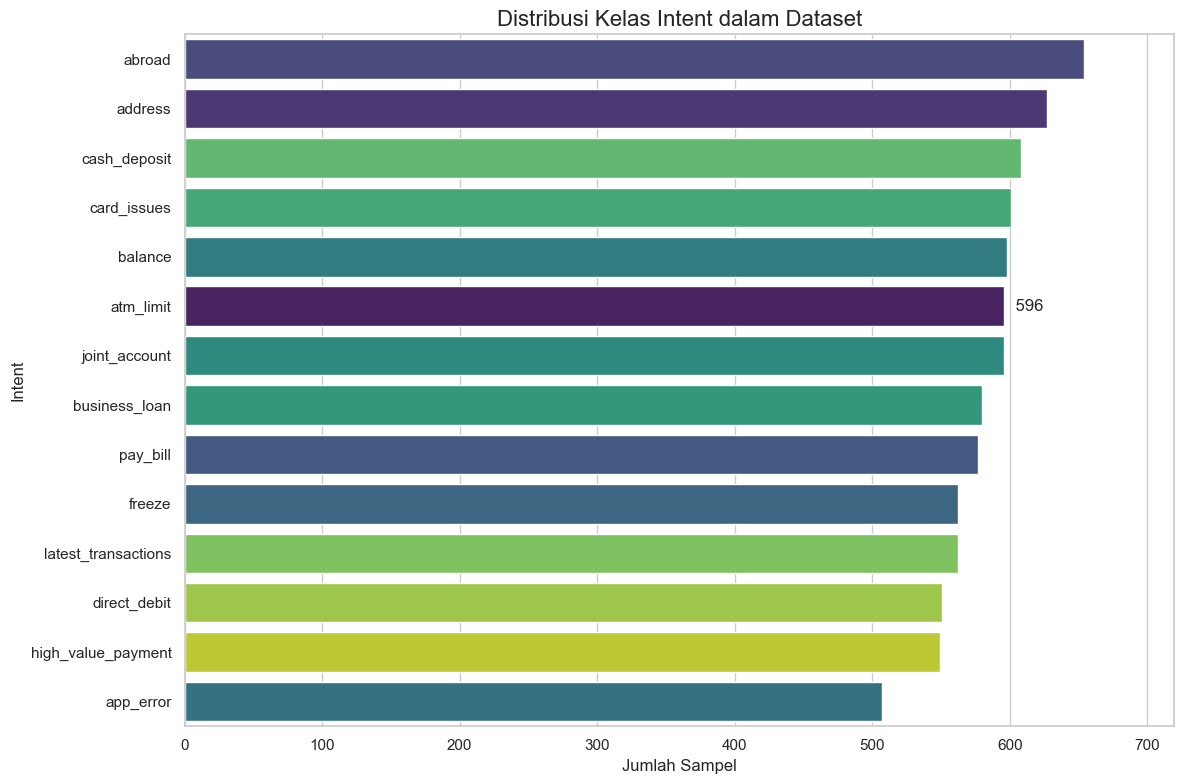

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import pandas as pd

sns.set_theme(style="whitegrid")

intent_labels = [intent_names[i] for i in dataset['intent_class']]
value_counts = pd.Series(intent_labels).value_counts()

plt.figure(figsize=(12, 8))
ax = sns.countplot(y=intent_labels, hue=intent_labels, order=value_counts.index, palette="viridis")
ax.bar_label(ax.containers[0], fmt=' %d', label_type='edge', padding=5)

plt.title('Distribusi Kelas Intent dalam Dataset', fontsize=16)
plt.xlabel('Jumlah Sampel', fontsize=12)
plt.ylabel('Intent', fontsize=12)
plt.xlim(0, value_counts.max() * 1.1)
plt.tight_layout()
plt.show()

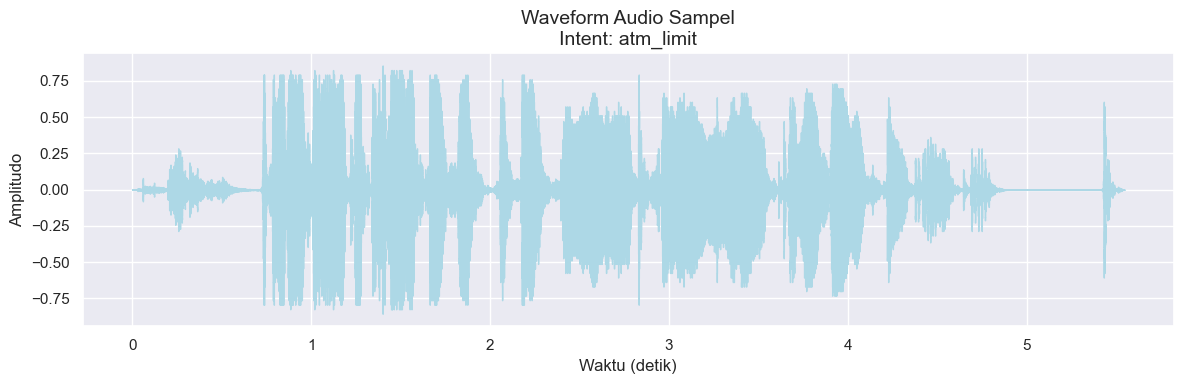

In [26]:
sns.set_theme(style="darkgrid")

y = sample['audio']['array']
sr = sample['audio']['sampling_rate']

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, color='lightblue')
plt.title(f'Waveform Audio Sampel\nIntent: {intent_names[sample["intent_class"]]}', fontsize=14)
plt.xlabel('Waktu (detik)', fontsize=12)
plt.ylabel('Amplitudo', fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
from transformers import Wav2Vec2FeatureExtractor

model_checkpoint = "facebook/wav2vec2-base-960h"
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_checkpoint)

intent_names = dataset.features['intent_class'].names
label2id, id2label = dict(), dict()
for i, label in enumerate(intent_names):
    label2id[label] = str(i)
    id2label[str(i)] = label
num_labels = len(id2label)

print("Nama-nama Intent :", intent_names)
print("\nJumlah Label :", num_labels)

Nama-nama Intent : ['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill']

Jumlah Label : 14


In [29]:
def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays, 
        sampling_rate=feature_extractor.sampling_rate, 
        max_length=int(feature_extractor.sampling_rate * 5.0), # padding audio ke 5 detik
        truncation=True,
    )
    # Ganti nama kolom 'intent_class' menjadi 'label'
    inputs["label"] = examples["intent_class"]
    return inputs

In [30]:
from datasets import Audio

dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

# Membagi dataset 70% train, 15% validation, 15% test
train_test_valid = dataset.train_test_split(test_size=0.3, seed=42)
test_valid = train_test_valid['test'].train_test_split(test_size=0.5, seed=42)

train_dataset = train_test_valid['train']
val_dataset = test_valid['train']
test_dataset = test_valid['test']

encoded_train_dataset = train_dataset.map(preprocess_function, remove_columns=dataset.column_names, batched=True)
encoded_val_dataset = val_dataset.map(preprocess_function, remove_columns=dataset.column_names, batched=True)
encoded_test_dataset = test_dataset.map(preprocess_function, remove_columns=dataset.column_names, batched=True)

print(f"Ukuran data train : {len(train_dataset)}")
print(f"Ukuran data validasi : {len(val_dataset)}")
print(f"Ukuran data test : {len(test_dataset)}")

Map: 100%|██████████| 1226/1226 [00:12<00:00, 101.28 examples/s]

Ukuran data train : 5717
Ukuran data validasi : 1225
Ukuran data test : 1226


In [ ]:
from transformers import Wav2Vec2ForSequenceClassification

model = Wav2Vec2ForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)

# Freeze layer Wav2Vec2.
for param in model.wav2vec2.parameters():
    param.requires_grad = False
print("Lapisan dasar berhasil dibekukan.")

trainable_params = 0
all_param = 0
for name, param in model.named_parameters():
    all_param += param.numel()
    if param.requires_grad:
        trainable_params += param.numel()
        print(f"  - {name}")
print(
    f"\nTotal Parameter : {all_param}"
    f"\nParameter Training : {trainable_params}"
    f"\nPersentase yang dilatih : {100 * trainable_params / all_param:.2f}%"
)

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Lapisan dasar berhasil dibekukan.
  - projector.weight
  - projector.bias
  - classifier.weight
  - classifier.bias

Total Parameter : 94572174
Parameter Training : 200462
Persentase yang dilatih : 0.21%


In [ ]:
import numpy as np
import evaluate
from transformers import TrainingArguments, Trainer

accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return accuracy_metric.compute(predictions=predictions, references=eval_pred.label_ids)

training_args = TrainingArguments(
    output_dir="./wav2vec2-minds14-intent-classification",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=2,
    eval_strategy="epoch",
    num_train_epochs=5,
    fp16=True,
    save_strategy="epoch",
    logging_steps=10,
    learning_rate=0.001,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none"
)

In [37]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train_dataset,
    eval_dataset=encoded_val_dataset,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

print("\nMulai Training")
trainer.train()
print("\nTraining Selesai")

C:\Users\Suwaaan\AppData\Local\Temp\ipykernel_25496\449070768.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



Mulai Training


C:\Users\Suwaaan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy
1,2.661000,2.641554,0.073469


C:\Users\Suwaaan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


KeyboardInterrupt: 

In [ ]:
print("\nEvaluasi model pada test set...")
test_results = trainer.evaluate(encoded_test_dataset)
print(test_results)